<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/Sea_Surface_Height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea surface height

This notebook uses data from the RIDDC ERDDAP server to map sea surface height over the ocean at a range of times. It is very low resolution, so you can plot large swaths of the globe within this Colab notebook without worrying about running out of RAM (you can see the gulf stream in the maps shown). However, this also means it doesn't look very impressive if you try to map sea surface height for a small area, such as that of the Ocean State Ocean Model.

In [ ]:
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#To use cartopy in a Colab notebook, I need a particular sequence of installs (as shown at this notebook: https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/quakes.ipynb#scrollTo=3LkZkXvnMAr4)
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;
!pip install shapely --no-binary shapely;
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

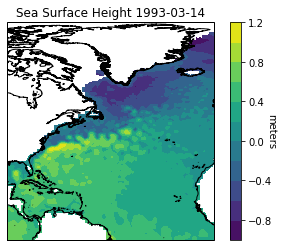

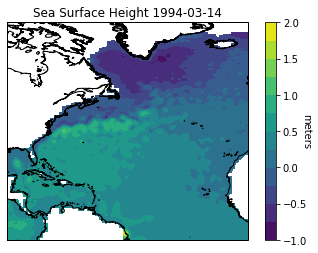

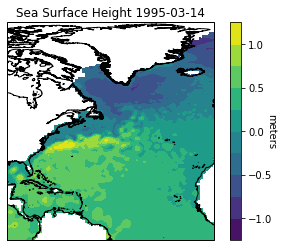

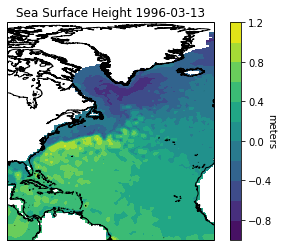

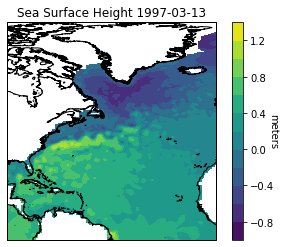

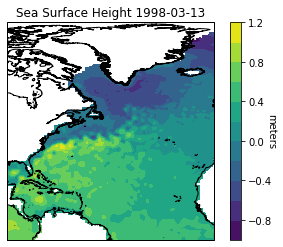

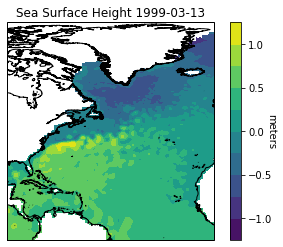

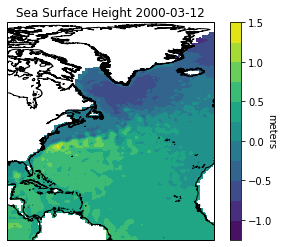

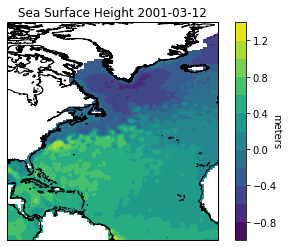

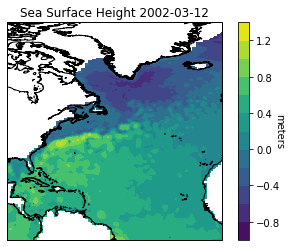

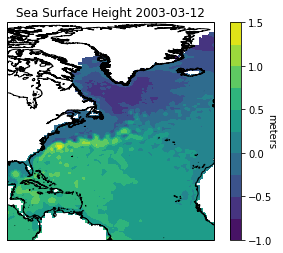

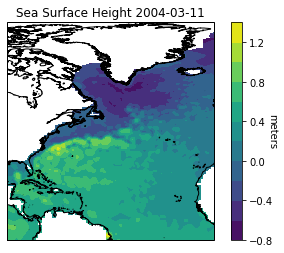

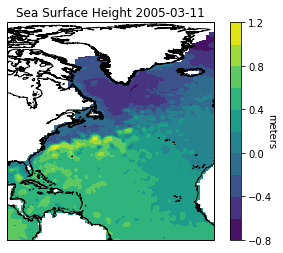

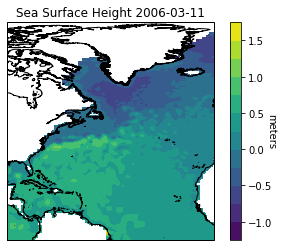

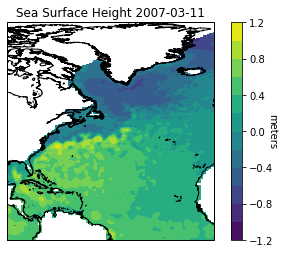

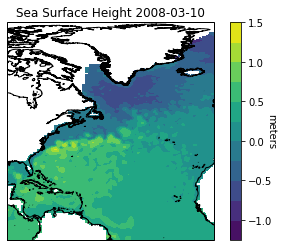

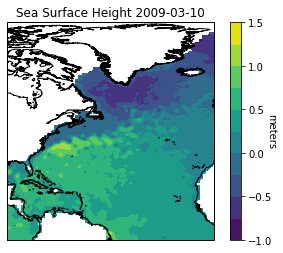

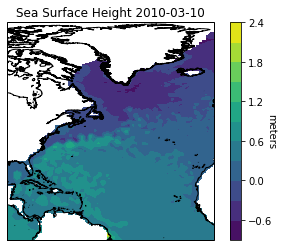

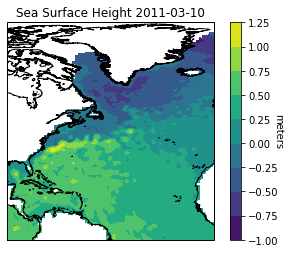

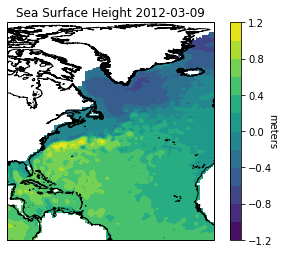

In [5]:
#the code dealing with datetime here is based on code at this link: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/erdTAssh1day'
from datetime import date, timedelta
dates2 = []
#making a list of dates
start_date = date(1993, 3, 14)
end_date = date(2012, 12, 9)
delta = timedelta(days=365)
while start_date<=end_date:
  dates2.append(str(start_date))
  start_date += delta
for i in dates2: #looping through the list of dates
    #making the url and opening the dataset:
    url = 'https://pricaimcit.services.brown.edu/erddap/griddap/erdTAssh1day.nc?ssh[('+i+'T12:00:00Z):1:('+i+'T12:00:00Z)][(0.0):1:(0.0)][(0):1:(90)][(270):1:(350)]'
    r = requests.get(url, allow_redirects=True)
    open('test.nc', 'wb').write(r.content)
    nc = NetCDFFile('test.nc')
    nc
    #defining some dataset variables
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time = nc.variables['time'][:]
    ssh = nc.variables['ssh'][:]
    ax = plt.gca(projection = ccrs.PlateCarree()) #this line and the one that follows put coastlines on the map
    ax.coastlines(resolution='10m')
    plt.contourf(lon, lat, ssh[0,0,:,:],10) #this is a contour plot
    plt.title('Sea Surface Height '+i)
    cbar = plt.colorbar()
    cbar.set_label('meters', rotation=270)
    plt.show()